In [112]:
import pandas as pd
import numpy as n
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#dt = dataset
dt = pd.read_excel("bankLimpo_0.1.xlsx")
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   duration   4521 non-null   int64
 10  campaign   4521 non-null   int64
 11  pdays      4521 non-null   int64
 12  previous   4521 non-null   int64
 13  poutcome   4521 non-null   int64
 14  y          4521 non-null   int64
dtypes: int64(15)
memory usage: 529.9 KB


In [113]:
x = dt.iloc[:,0:15].values
x = dt.drop(dt.columns[14], axis=1)
y = dt.iloc[:,14].values

#display(x)

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

x_test


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
4274,35,12,1,2,0,748,0,0,1,94,7,130,3,1
72,31,5,2,2,0,152,1,0,0,563,1,-1,0,0
1065,30,2,2,2,0,270,1,0,0,116,1,-1,0,0
3185,42,3,2,4,0,756,0,0,2,396,3,-1,0,0
130,41,12,2,2,0,3608,1,0,0,231,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,45,2,1,2,0,622,0,0,2,1451,2,-1,0,0
2106,47,12,2,1,0,607,0,0,0,29,2,-1,0,0
242,44,10,2,3,0,2,1,0,2,180,1,-1,0,0
4402,41,12,2,2,0,120,1,0,0,20,11,-1,0,0


In [115]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [116]:
previsao = rf.predict(x_test)
previsao

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
accuracy_score(y_test, previsao)

0.8930150309460654

C:\Users\Pedro Evaristo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8930150309460654

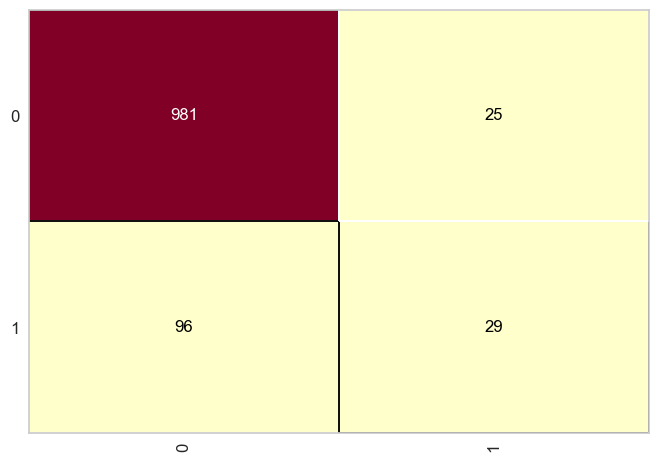

In [118]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)